In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
DF = pd.DataFrame

def now():
    return time.strftime('%Y-%m-%d__%H-%M', time.localtime())

In [3]:
# Read in the data
inputdir = '../input/m5-forecasting-accuracy/'
cal = pd.read_csv(inputdir+'calendar.csv')
stv = pd.read_csv(inputdir+'sales_train_validation.csv')
ss = pd.read_csv(inputdir+'sample_submission.csv')
sellp = pd.read_csv(inputdir+'sell_prices.csv')

In [4]:
datadir = '../data/m5-forecasting/' # to save 'clean' data

# Sales

In [5]:
stv.sort_values('id', inplace=True)

In [6]:
stv

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
1612,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,0,0,1,...,0,2,0,4,1,1,0,1,1,0
4661,FOODS_1_001_CA_2_validation,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,2,0,0,0,...,1,0,14,0,1,1,4,0,0,4
7710,FOODS_1_001_CA_3_validation,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,1,2,1,1,...,0,0,13,0,0,0,0,0,1,0
10759,FOODS_1_001_CA_4_validation,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,0,1,1,1,...,0,0,0,2,0,0,0,1,1,1
13808,FOODS_1_001_TX_1_validation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16856,HOUSEHOLD_2_516_TX_2_validation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
19905,HOUSEHOLD_2_516_TX_3_validation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX_3,TX,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22954,HOUSEHOLD_2_516_WI_1_validation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_1,WI,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
26003,HOUSEHOLD_2_516_WI_2_validation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
products = [x.rsplit('_', 1)[0] for x in stv['id']]
sales = stv.drop(columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']).T.copy()
sales.index = range(len(sales))
sales.columns = products

In [8]:
sales

,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,FOODS_1_001_WI_3,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,3,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,2,1,1,0,0,2,0,0,...,1,0,1,0,0,1,0,0,0,1
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,2,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,4,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1909,0,4,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1910,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1911,1,0,1,1,0,1,0,8,0,4,...,0,0,0,0,0,0,0,0,0,0


In [9]:
sales.astype(np.int16).to_feather(datadir+'sales.feather')

## Aggregations
Make aggregation masks, need for uncertainty competition

In [10]:
stv.rename(columns={'item_id':'item', 'dept_id':'dept', 'cat_id':'cat', 
                    'store_id':'store', 'state_id':'state'}, 
            inplace=True)

stv['x'] = 'X'

In [11]:
def make_agg_names_masks(stv, prod_agg, loc_agg):
    pa_vals = stv[prod_agg].unique()
    la_vals = stv[loc_agg].unique()

    masks = {}
    for p in pa_vals:
        for l in la_vals:
            m = ((stv[prod_agg] == p) & (stv[loc_agg] == l)).values.astype(np.bool)
            name = p+'_X' if l=='X' else l+'_'+p
            if name == 'X_X': name = 'Total_X'
            masks[name] = m
    return DF(masks)

In [12]:
prod_agg_list = 'item dept cat x'.split()
loc_agg_list = 'store state x'.split()

mm = []
for prod_agg in prod_agg_list:
    for loc_agg in loc_agg_list:
        if prod_agg == 'item' and loc_agg == 'store': continue
        print (f'aggregations by {prod_agg}, {loc_agg}: ', end ='')
        mm += [make_agg_names_masks(stv, prod_agg, loc_agg)]
        print (mm[-1].shape[1], ' series')

agg_masks = pd.concat(mm, axis=1)

aggregations by item, state: 9147  series
aggregations by item, x: 3049  series
aggregations by dept, store: 70  series
aggregations by dept, state: 21  series
aggregations by dept, x: 7  series
aggregations by cat, store: 30  series
aggregations by cat, state: 9  series
aggregations by cat, x: 3  series
aggregations by x, store: 10  series
aggregations by x, state: 3  series
aggregations by x, x: 1  series


In [13]:
agg_masks.to_feather(datadir+'agg_masks.feather')

# Calendar

In [14]:
cal

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [15]:
# week to first day of week, will need later
wk2day = {wk: df.index.min() for wk, df in cal.groupby('wm_yr_wk')}

In [16]:
cal['day'] = cal.date.map(lambda x: int(x.rsplit('-')[0]))
cal = cal.drop(columns=['date', 'wm_yr_wk', 'weekday', 'd'])
cal = cal.replace(np.nan, '')

In [17]:
cal

,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day
0,1,1,2011,,,,,0,0,0,2011
1,2,1,2011,,,,,0,0,0,2011
2,3,1,2011,,,,,0,0,0,2011
3,4,2,2011,,,,,1,1,0,2011
4,5,2,2011,,,,,1,0,1,2011
...,...,...,...,...,...,...,...,...,...,...,...
1964,5,6,2016,,,,,0,1,1,2016
1965,6,6,2016,,,,,0,0,0,2016
1966,7,6,2016,,,,,0,0,0,2016
1967,1,6,2016,,,,,0,0,0,2016


In [18]:
coltypes = {c: 'string' if c.startswith('event') else np.int16 for c in cal.columns}
cal.astype(coltypes).to_feather(datadir+'cal.feather')

# Prices

In [19]:
sellp

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [20]:
# Convert to wide format
sellp['id'] = sellp['item_id'] + '_' + sellp['store_id']
sellpw = sellp.drop(columns=['item_id', 'store_id']).pivot(index='wm_yr_wk', columns='id')['sell_price']
sellpw = sellpw.rename(index=wk2day)
sellpw = sellpw.reindex(columns=sales.columns.values) # make sure that the order of products is the same

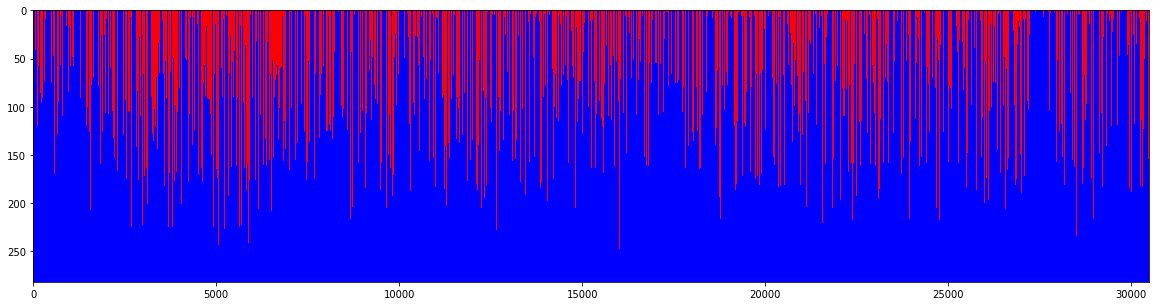

In [21]:
# Nans in prices
plt.figure(figsize=(20,5))
plt.imshow(sellpw.isnull().values, aspect='auto', cmap='bwr')

In [22]:
sellpw

id,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,FOODS_1_001_WI_3,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
wm_yr_wk,,,,,,,,,,,,,,,,,,,,,
0,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
7,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,5.94,5.94,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
14,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
21,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
28,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,NaN,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1946,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1953,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94


In [23]:
# That's how sellpw can be aligned with cal 
price = sellpw.reindex(index = cal.index).ffill(limit=6)

In [24]:
price

id,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,FOODS_1_001_WI_3,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
3,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
4,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1965,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1966,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1967,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94


In [25]:
# Price == nan <=> product unavailable?
(price.isnull() & (sales > 0)).any().any()

False

In [26]:
# Feather doesn't save index, so need reset it, which creates a new column with the name of the index ('wm_yr_wk')
sellpw.astype(np.float32).reset_index().to_feather(datadir+'prices.feather')

In [27]:
# When loading, restore index
p = pd.read_feather(datadir+'prices.feather').set_index('wm_yr_wk')
# and align with calendar
p = p.reindex(index = cal.index).ffill(limit=6)

In [28]:
p

,FOODS_1_001_CA_1,FOODS_1_001_CA_2,FOODS_1_001_CA_3,FOODS_1_001_CA_4,FOODS_1_001_TX_1,FOODS_1_001_TX_2,FOODS_1_001_TX_3,FOODS_1_001_WI_1,FOODS_1_001_WI_2,FOODS_1_001_WI_3,...,HOUSEHOLD_2_516_CA_1,HOUSEHOLD_2_516_CA_2,HOUSEHOLD_2_516_CA_3,HOUSEHOLD_2_516_CA_4,HOUSEHOLD_2_516_TX_1,HOUSEHOLD_2_516_TX_2,HOUSEHOLD_2_516_TX_3,HOUSEHOLD_2_516_WI_1,HOUSEHOLD_2_516_WI_2,HOUSEHOLD_2_516_WI_3
0,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
1,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
2,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
3,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
4,2.00,2.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,...,5.94,NaN,5.94,NaN,NaN,5.94,5.94,5.94,NaN,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1965,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1966,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
1967,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94


# Accuracy Sample Submission

In [29]:
inputdir = '../input/m5-forecasting-accuracy/'
ss = pd.read_csv(inputdir+'sample_submission.csv')

In [30]:
ss

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# No aggregations for accuracy
set([len(p.split('_')) for p in ss['id']])

{6}

# Make test submission

In [32]:
val_start = 1913
tst_start = 1913 + 28

In [33]:
###### Repeat last 28 days for val
ms_val = sales[-28:].T
ms_val.index = [p + '_validation' for p in ms_val.index]
ms_val.index.name = 'id'
ms_val.columns = [f'F{i+1}' for i in range(28)]

# And for test
ms_tst = sales[-28:].T
ms_tst.index = [p + '_evaluation' for p in ms_tst.index]
ms_tst.index.name = 'id'
ms_tst.columns = [f'F{i+1}' for i in range(28)]

# Combine
ms = pd.concat([ms_val, ms_tst])
fn = '../output/m5-accuracy-{now()}'
#ms.to_csv(fn+'.csv', index=False)
ms.reset_index().to_csv(fn+'csv.gz', index=False, compression='gzip')
ms

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001_CA_1_validation,2,1,1,0,4,0,0,4,1,3,...,0,2,0,4,1,1,0,1,1,0
FOODS_1_001_CA_2_validation,0,0,0,0,0,0,0,1,1,2,...,1,0,14,0,1,1,4,0,0,4
FOODS_1_001_CA_3_validation,0,0,1,0,0,1,0,0,0,1,...,0,0,13,0,0,0,0,0,1,0
FOODS_1_001_CA_4_validation,2,0,0,0,0,0,0,1,0,1,...,0,0,0,2,0,0,0,1,1,1
FOODS_1_001_TX_1_validation,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HOUSEHOLD_2_516_TX_2_evaluation,0,0,1,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
HOUSEHOLD_2_516_TX_3_evaluation,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
HOUSEHOLD_2_516_WI_1_evaluation,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Uncertainty Sample submission
it's pretty complicated

In [34]:
ssu = pd.read_csv('../input/m5-forecasting-uncertainty/sample_submission.csv')

In [35]:
ssu

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,Total_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CA_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TX_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WI_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CA_1_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771115,FOODS_3_823_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771116,FOODS_3_824_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771117,FOODS_3_825_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771118,FOODS_3_826_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Uncertainty quantiles
quantiles = sorted(list(set([p.rsplit('_', 2)[1] for p in ssu['id'] if p.endswith('validation')])))
quantiles

['0.005',
 '0.025',
 '0.165',
 '0.250',
 '0.500',
 '0.750',
 '0.835',
 '0.975',
 '0.995']

In [37]:
# Products including aggregates
products = sorted(list(set([p.rsplit('_', 2)[0] for p in ssu['id'] if p.endswith('validation')])))

In [38]:
# Nothing here, thank god
sorted([p for p in products if len(p.split('_'))==1])

[]

In [39]:
# Hightest level aggregates
sorted([p for p in products if len(p.split('_'))==2])

['CA_FOODS',
 'CA_HOBBIES',
 'CA_HOUSEHOLD',
 'CA_X',
 'FOODS_X',
 'HOBBIES_X',
 'HOUSEHOLD_X',
 'TX_FOODS',
 'TX_HOBBIES',
 'TX_HOUSEHOLD',
 'TX_X',
 'Total_X',
 'WI_FOODS',
 'WI_HOBBIES',
 'WI_HOUSEHOLD',
 'WI_X']

In [40]:
# Next level
', '.join(sorted([p for p in products if len(p.split('_'))==3]))

'CA_1_FOODS, CA_1_HOBBIES, CA_1_HOUSEHOLD, CA_1_X, CA_2_FOODS, CA_2_HOBBIES, CA_2_HOUSEHOLD, CA_2_X, CA_3_FOODS, CA_3_HOBBIES, CA_3_HOUSEHOLD, CA_3_X, CA_4_FOODS, CA_4_HOBBIES, CA_4_HOUSEHOLD, CA_4_X, CA_FOODS_1, CA_FOODS_2, CA_FOODS_3, CA_HOBBIES_1, CA_HOBBIES_2, CA_HOUSEHOLD_1, CA_HOUSEHOLD_2, FOODS_1_X, FOODS_2_X, FOODS_3_X, HOBBIES_1_X, HOBBIES_2_X, HOUSEHOLD_1_X, HOUSEHOLD_2_X, TX_1_FOODS, TX_1_HOBBIES, TX_1_HOUSEHOLD, TX_1_X, TX_2_FOODS, TX_2_HOBBIES, TX_2_HOUSEHOLD, TX_2_X, TX_3_FOODS, TX_3_HOBBIES, TX_3_HOUSEHOLD, TX_3_X, TX_FOODS_1, TX_FOODS_2, TX_FOODS_3, TX_HOBBIES_1, TX_HOBBIES_2, TX_HOUSEHOLD_1, TX_HOUSEHOLD_2, WI_1_FOODS, WI_1_HOBBIES, WI_1_HOUSEHOLD, WI_1_X, WI_2_FOODS, WI_2_HOBBIES, WI_2_HOUSEHOLD, WI_2_X, WI_3_FOODS, WI_3_HOBBIES, WI_3_HOUSEHOLD, WI_3_X, WI_FOODS_1, WI_FOODS_2, WI_FOODS_3, WI_HOBBIES_1, WI_HOBBIES_2, WI_HOUSEHOLD_1, WI_HOUSEHOLD_2'

In [41]:
# Then one more level

In [42]:
# And individual products
len([p for p in products if len(p.split('_'))==5]) == len(stv.columns)

False

# Make test submission

In [43]:
# Repeat last 28 days for all quantiles
# The only difference with uncertainty submission is the need to compute aggregate sales

In [46]:
# Last 28 days sales as array
sa = sales.values[-28:]

# Compute aggregate sales
# Loop is faster than dot product
agg_sa = np.zeros((sa.shape[0], agg_masks.shape[1]), dtype = np.int64)
for i in range(agg_masks.shape[1]):
    agg_sa[:,i] = sa[:, agg_masks.values[:,i]].sum(1)

In [47]:
# Make index
idx = [p + '_' + q + '_' + s 
    for s in ['validation', 'evaluation'] 
       for q in quantiles 
           for p in list(sales.columns) + list(agg_masks.columns)
]

In [48]:
fn = f'../output/m5-uncertainty-{now()}'

In [49]:
# Construct full dataframe and dump to disk
DF(
    np.tile(np.concatenate([sa.T, agg_sa.T]), [18, 1]),
    index = pd.Index(idx, name='id'),
    columns = [f'F{i+1}' for i in range(28)],
    dtype = np.int64
) \
.reset_index() \
.to_csv(fn+'.csv.gz', index=False, compression='gzip') 